In [7]:
#import tensorflow
import warnings

warnings.filterwarnings ('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
def calculate_adj_r2(r_sq, k, n):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

In [8]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("auto-mpg.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = ['cylinders', 'displacement', 'horsepower', 'weight',
        'model year', 'origin', 'car name' ]
#X=['weight', 'model year', 'origin']

Y = ['mpg']
# X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
# df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
# df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
# print(df_train.size)
# print(df_test.size)
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [9]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

activation_list = ['linear','relu', 'sigmoid', 'tanh', 'elu','softmax','softplus','softsign','selu','exponential']


Activation Function: linear
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


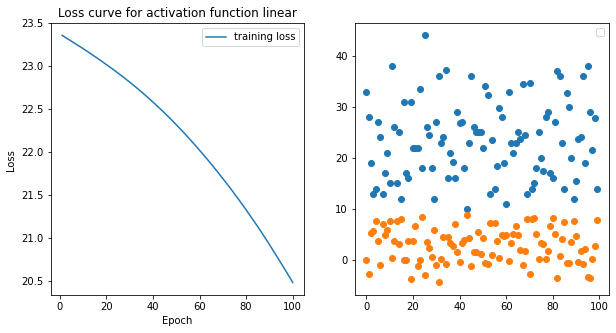

Activation Function: relu
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


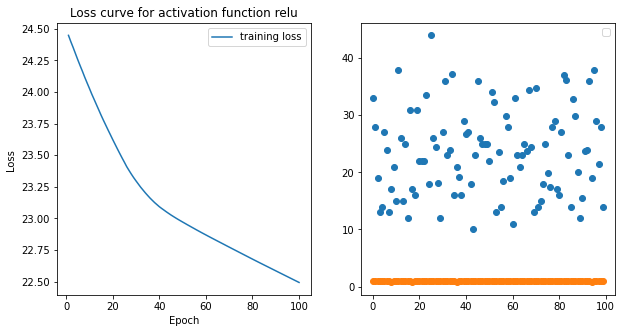

Activation Function: sigmoid
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


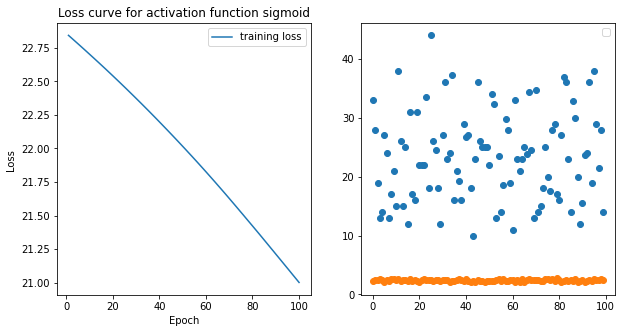

Activation Function: tanh
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


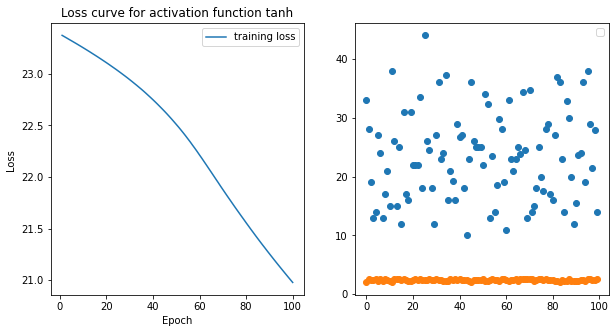

Activation Function: elu
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


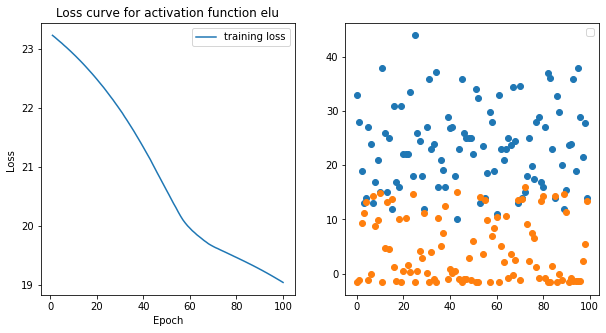

Activation Function: softmax
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


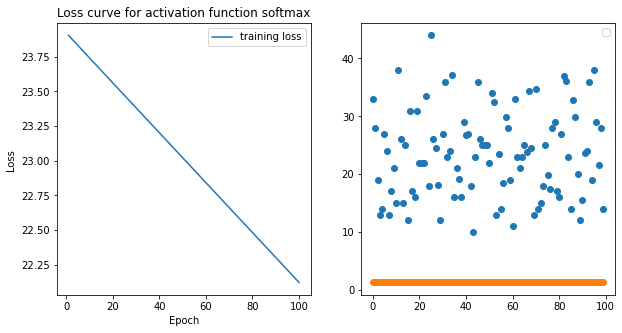

Activation Function: softplus
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


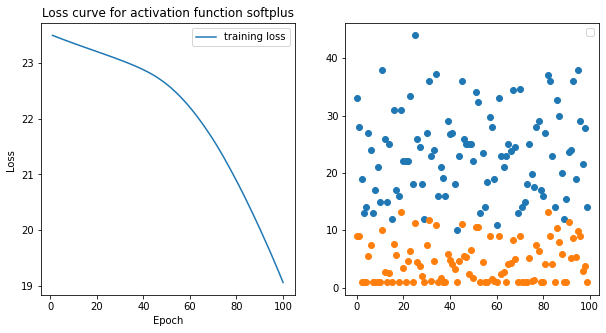

Activation Function: softsign
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


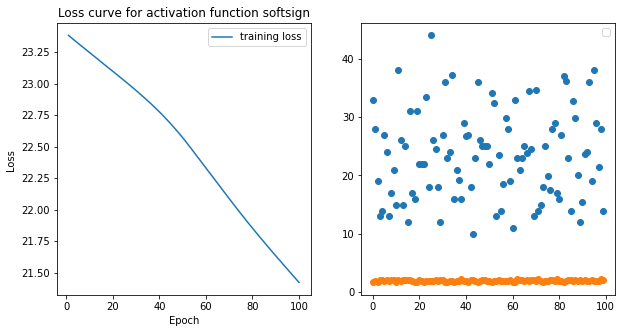

Activation Function: selu
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


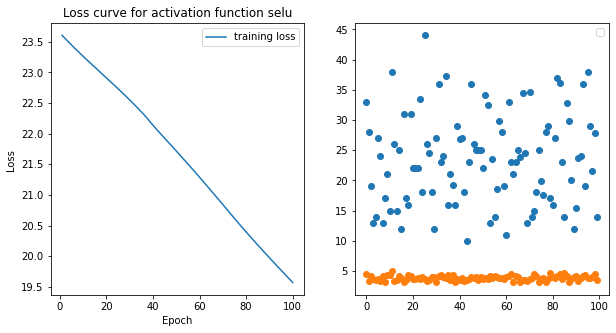

Activation Function: exponential
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


No handles with labels found to put in legend.


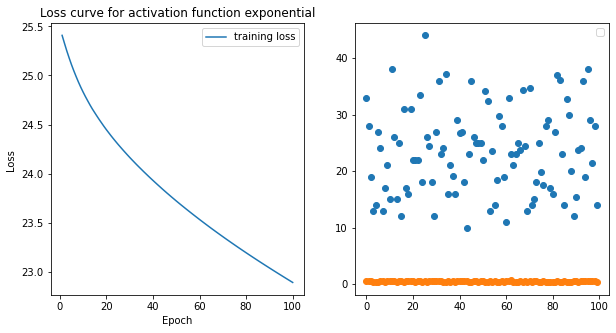

In [10]:
#Defines linear regression model and its structure
r2_bar_list=[]
r2_list = []
for i in activation_list:
    print("Activation Function:" , i)
    model = Sequential()
    model.add(Dense(1,input_dim=len(X), activation=i))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mae', metrics=['mae']) 
    #model.compile(Adam(lr=0.003), 'mean_squared_error')


    #Fits model
    history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    print(history_dict.keys())
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    #plt.figure()
#     plt.plot(loss_values,label='training loss')
#     plt.plot(val_loss_values,label='val training loss')
#     plt.show()
    # Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
    # with its current weights on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    epochs = range(1, len(loss_values) + 1)
    
    r2=r2_score(Y_test, y_test_pred)
    r2_list.append(r2)
    r2_bar_list.append(calculate_adj_r2(r2, len(X),len(X_test)))
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(121)
    plt.title('Loss curve for activation function '+ i)
    plt.xlabel('Epoch')
    plt.ylabel('Loss ')
    plt.plot(epochs, loss_values, '-', label='training loss')
    plt.legend()
    plt.subplot(122)
    plt.scatter(x=range(len(X_test)), y=Y_test)
    plt.scatter(x=range(len(X_test)), y=y_test_pred)
    #plt.plot(epochs, val_loss_values, ':', label='val training loss')
    
    
    plt.legend(loc='upper right')
    plt.show()

    # Calculates and prints r2 score of training and testing data
    #print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train, y_train_pred)))
    #print("The R2 score on the Test set is:\t{:0.3f}".format()

In [11]:
print("Neural Net 2 Layers")
for i in range(len(activation_list)):
    print("R2 value for using activation function %s : %s", activation_list[i], r2_list[i])
    print("Ad R2 value for using activation function %s : %s", activation_list[i], r2_bar_list[i])

Neural Net 2 Layers
R2 value for using activation function %s : %s linear -8.423440992477532
Ad R2 value for using activation function %s : %s linear -9.140441937557345
R2 value for using activation function %s : %s relu -8.980247265884124
Ad R2 value for using activation function %s : %s relu -9.739613905679654
R2 value for using activation function %s : %s sigmoid -7.832989339645589
Ad R2 value for using activation function %s : %s sigmoid -8.50506461548819
R2 value for using activation function %s : %s tanh -7.8155553110758085
Ad R2 value for using activation function %s : %s tanh -8.48630408474462
R2 value for using activation function %s : %s elu -8.270155129711775
Ad R2 value for using activation function %s : %s elu -8.97549302001593
R2 value for using activation function %s : %s softmax -8.685064144647864
Ad R2 value for using activation function %s : %s softmax -9.42197119913194
R2 value for using activation function %s : %s softplus -5.776461412837807
Ad R2 value for using ac

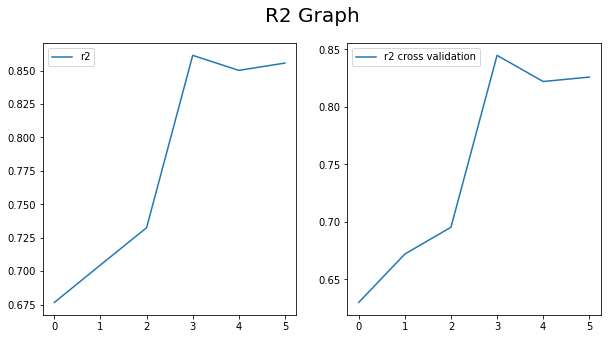

['displacement', 'horsepower', 'weight', 'model year', 'origin', 'car name']
['displacement', 'horsepower', 'weight', 'model year']


In [15]:
r2_list = []
r2_bar_list=[]
r2_cv_list=[]
col_list = []
updated_cols=[]
r_max=0
for i in X[1:]:
    col_list.append(i)
    model_cv = Sequential()    
    model_cv.add(Dense(13, input_dim=len(col_list), activation='relu'))
    model_cv.add(Dense(1))
    model_cv.compile(optimizer='adam', loss='mae', metrics=['mae']) 
    X_train = preprocessing.scale(df_encode[col_list])

    history = model_cv.fit(X_train, df_encode[Y], epochs = 100, validation_split = 0.2,verbose = 0, batch_size=10)
    history_dict=history.history
    y_test_pred = model_cv.predict(X_train)
    r2=r2_score(df_encode[Y], y_test_pred)
    r2_cv_list.append(r2)
    model = Sequential()    
    model.add(Dense(13, input_dim=len(col_list), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mae', metrics=['mae']) 
    history = model.fit(X_train, df_encode[Y], epochs = 100, verbose = 0, batch_size=10)
    history_dict=history.history
    y_test_pred = model.predict(X_train)
    r2=r2_score(df_encode[Y], y_test_pred)
    if r2>r_max:
        r_max=r2
        updated_cols.append(i)
    r2_list.append(r2)
    adjusted_r2 = calculate_adj_r2(r2, X_train.shape[1],len(col_list))
    r2_bar_list.append(adjusted_r2)
plt.subplots(1,2,figsize=(10,5))
plt.suptitle("R2 Graph", fontsize=20)
plt.subplot(121)
plt.plot( range(len(col_list)), r2_list,label="r2")
#plt.plot( range(len(col_list)), r2_bar_list,label="r2 bar")
plt.legend()
plt.subplot(122)
plt.plot( range(len(col_list)), r2_cv_list,label="r2 cross validation")
plt.legend()
plt.show()
    
print(col_list)
print(updated_cols)